In [1]:
cd drive/My Drive/google_colab_gpu/SOP3-2/DOP/MNIST Digit Classifier

/content/drive/My Drive/google_colab_gpu/SOP3-2/DOP/MNIST Digit Classifier


In [2]:
import keras
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


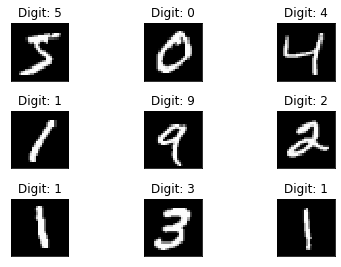

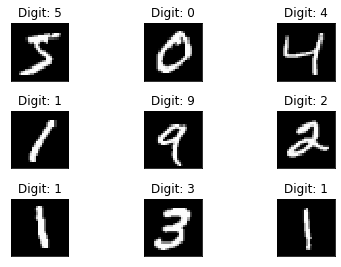

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [0]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
img_rows=X_train.shape[1]
img_cols=X_train.shape[2]

In [0]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
from keras import backend as k
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [0]:
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [0]:
X_test.shape

(10000, 28, 28, 1)

In [0]:
from numpy import save
save('input_data1.npy', x_tp[:10])
save('output_data.npy', y_test[:10])

In [0]:
from numpy import load
X_test= load('input_data.npy')
y_test=load('output_data.npy')

In [0]:
import numpy
numpy.savetxt("input_data.csv", x_tp, delimiter=",")

ValueError: ignored

In [0]:
x_tp=X_test.reshape((X_test.shape[0], img_rows, img_cols))

In [0]:
X_test.shape,x_tp.shape

((10, 28, 28, 1), (10, 28, 28))

In [0]:
x_tp[1,4:9,4:9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.6627451 ],
       [0.        , 0.        , 0.        , 0.20392157, 0.98039216],
       [0.        , 0.        , 0.        , 0.3019608 , 0.9843137 ],
       [0.        , 0.        , 0.        , 0.        , 0.12156863]],
      dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.2731 - accuracy: 0.9154 - val_loss: 0.0581 - val_accuracy: 0.9824
Epoch 2/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0867 - accuracy: 0.9737 - val_loss: 0.0415 - val_accuracy: 0.9854
Epoch 3/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0675 - accuracy: 0.9801 - val_loss: 0.0341 - val_accuracy: 0.9885
Epoch 4/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0542 - accuracy: 0.9833 - val_loss: 0.0312 - val_accuracy: 0.9891
Epoch 5/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0314 - val_accuracy: 0.9898
Epoch 6/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0423 - accuracy: 0.9874 - val_loss: 0.0283 - val_accuracy: 0.9902
Epoch 7/10
60000/60000 [==============================] - 8s 

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.02760820086687472
Test accuracy: 0.9904999732971191


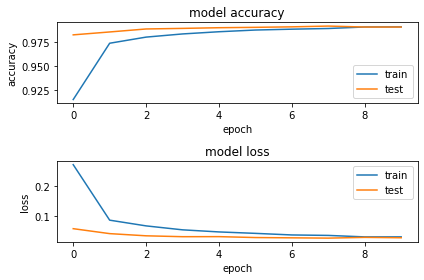

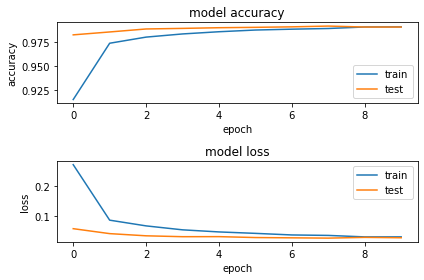

In [0]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [0]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


In [4]:
from keras.models import load_model,model_from_json
# load json and create model
json_file = open('model_digit.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_digit.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
from keras.models import Model
op=Model(inputs=model.input, outputs=model.get_layer('dense_2').output).predict(X_test[9].reshape(1,28,28,1))

In [0]:
op=model.predict(X_test)

In [0]:
np.argmax(op,1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [0]:
weights=model.get_weights()

In [13]:
import numpy as np
#weight = np.array([-31.63, -6.54, 0.45, 0.90, 31])
weight=weights[0]
min_wt = weight.min() 
max_wt = weight.max()
#find number of integer bits to represent this range
int_bits = int(np.ceil(np.log2(max(abs(min_wt),abs(max_wt))))) # 31.63 --> 5 bits
frac_bits = 7-int_bits #remaining bits are fractional bits (1-bit for sign), 7-5 = 2 bits
#floating point weights are scaled and rounded to [-128,127], which are used in
#the fixed-point operations on the actual hardware (i.e., microcontroller)
quant_weight = np.round(weight*(2**frac_bits)) # 31 * 2^(2 bits frac) = 124
#To quantify the impact of quantized weights, scale them back to
# original range to run inference using quantized weights
recovered_weight = quant_weight/(2**frac_bits)
print('quantization format: \t Q'+str(int_bits)+'.'+str(frac_bits))
print('Orginal weights:  ', weight)
print('Quantized weights:', quant_weight)
print('Recovered weights:', recovered_weight)

quantization format: 	 Q0.7
Orginal weights:   [[[[-2.23939925e-01 -8.27532262e-02  7.20681027e-02 -9.78330150e-02
     2.43616536e-01  2.63780475e-01  1.12143897e-01  2.85914510e-01
     2.34264478e-01  2.44445294e-01  2.36906677e-01 -1.41713411e-01
    -1.83865160e-01 -9.92272515e-03 -7.77351335e-02  4.88869101e-02
     2.66199857e-01  3.05016786e-01  2.43843794e-01 -7.32084438e-02
    -2.97164917e-01 -3.22052181e-01  2.79692691e-02 -2.75080621e-01
    -1.86501428e-01  4.08752076e-02  1.43183500e-01 -1.18927211e-01
    -2.22407207e-01  3.49786371e-01 -1.33386910e-01 -1.13793164e-01]]

  [[-2.27035344e-01 -2.30193302e-01  1.68272778e-01 -2.02654481e-01
    -1.04339175e-01  5.98526262e-02 -2.56741971e-01  3.45445901e-01
    -4.29288149e-02 -2.70590279e-02  2.40257218e-01 -9.60801765e-02
     1.19335718e-01 -1.85286358e-01  3.21877040e-02  1.78818136e-01
     2.44187757e-01 -1.37589544e-01  2.22738877e-01  1.12978607e-01
    -1.27663642e-01  9.67365801e-02  1.26078606e-01 -2.88757652e-0

In [26]:
int_bits,frac_bits

(0, 7)

In [23]:
import sys,math
sys.getsizeof(weight),sys.getsizeof(quant_weight),sys.getsizeof(recovered_weight)

(1296, 1296, 1296)

In [25]:
weight[0:2,1,:,:],recovered_weight[0:2,1,:,:]

(array([[[-0.22703534, -0.2301933 ,  0.16827278, -0.20265448,
          -0.10433917,  0.05985263, -0.25674197,  0.3454459 ,
          -0.04292881, -0.02705903,  0.24025722, -0.09608018,
           0.11933572, -0.18528636,  0.0321877 ,  0.17881814,
           0.24418776, -0.13758954,  0.22273888,  0.11297861,
          -0.12766364,  0.09673658,  0.1260786 , -0.28875765,
           0.01220139,  0.1980483 ,  0.16330497,  0.07345723,
          -0.31792316, -0.00064236,  0.08584776,  0.09100967]],
 
        [[ 0.10302065,  0.11619012,  0.09156273, -0.06783675,
           0.03281417, -0.04028827, -0.12506014, -0.04793312,
           0.06855245, -0.09658384, -0.0751959 , -0.21336152,
           0.20648031,  0.17651032,  0.16783987,  0.05096431,
          -0.07227284, -0.06852625, -0.03529804,  0.1252421 ,
          -0.05799665, -0.07873256, -0.1453716 , -0.07208879,
           0.0021966 ,  0.16880731, -0.15649119,  0.2102723 ,
           0.10960501, -0.39469755,  0.16370805,  0.14001423]]],
 